In [177]:
# Importing our libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import functools

# Sklearn all
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)

In [14]:
# Load data
data = pd.read_csv("/Users/lluisarull/Desktop/DSDM/Machine_Learning/Assignment4/churn_data - churn_data.csv", sep=';')
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.20,77,71.70,10.78,9.90
3329,0,68,1,0,0.34,3,231.10,57,56.40,7.67,9.60
3330,0,28,1,0,0.00,2,180.80,109,56.00,14.44,14.10
3331,0,184,0,0,0.00,2,213.80,105,50.00,7.98,5.00


**1.Exploring and understanding the dataset**

In [15]:
#Data shape
data.shape

(3333, 11)

In [16]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
#Checking for missing values

total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

missing_data

,Total,Percent
Churn,0,0.00
AccountWeeks,0,0.00
ContractRenewal,0,0.00
DataPlan,0,0.00
DataUsage,0,0.00
CustServCalls,0,0.00
DayMins,0,0.00
DayCalls,0,0.00
MonthlyCharge,0,0.00
OverageFee,0,0.00


We can see there is no null data neither categorical data in the dataset

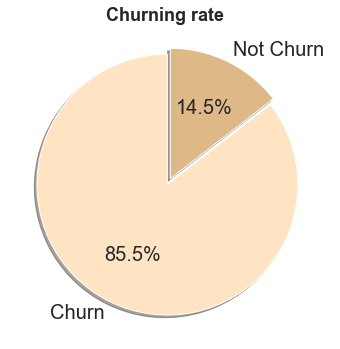

In [75]:
#Ploting the target 
labels = ['Churn', 'Not Churn']
sizes = data['Churn'].value_counts(sort = True)

colors = ["bisque","burlywood"]
explode = (0.05,0) 
 
plt.figure(figsize=(6,6))
plt.suptitle("Churning rate",y=0.9, size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})
plt.show()


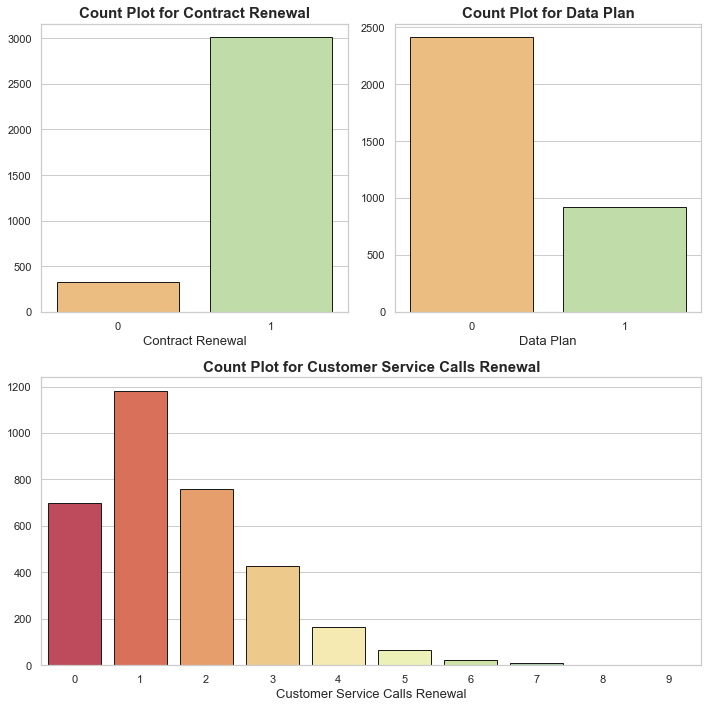

In [68]:
ax = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data = data , x = "ContractRenewal" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Contract Renewal" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Contract Renewal", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.subplot(2,2,2)
sns.countplot(data = data , x = "DataPlan" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Data Plan" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Data Plan", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.subplot(2,2,(3,4))
sns.countplot(data = data , x = "CustServCalls" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Customer Service Calls Renewal" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Customer Service Calls Renewal", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.tight_layout()
plt.show()

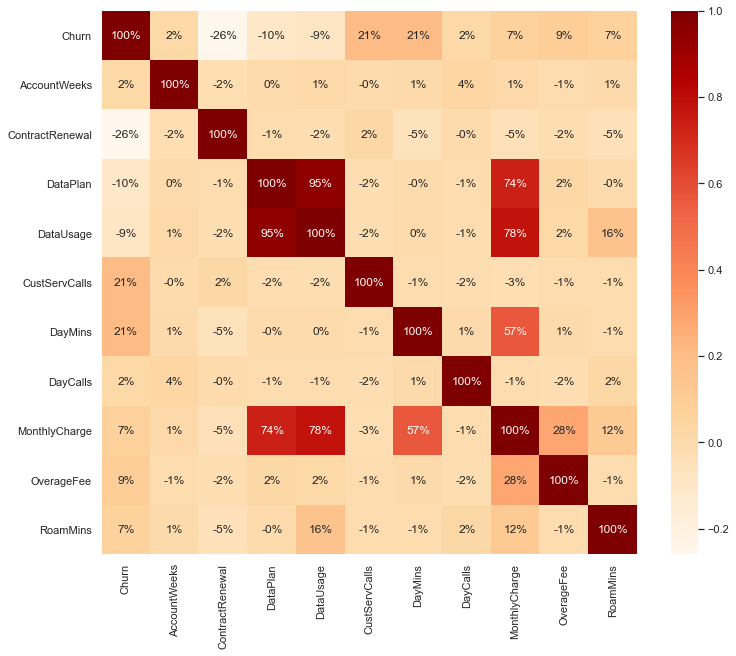

In [96]:
#Correlation map
ax = plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="OrRd", fmt='.0%')
plt.show()

In the previous correlation map we are able to see that the probability of churning is negatively correlated with DataUsage and positively correlated with all the other attributes (we are not considering Contract Renewal and Data Plan as they are dummy variables). We have analyzed their impact on churning hereafter.

We are also able to check that DataPlan and DataUsage are highly correlated attributes, and they are also correlated with MonthlyCharge.

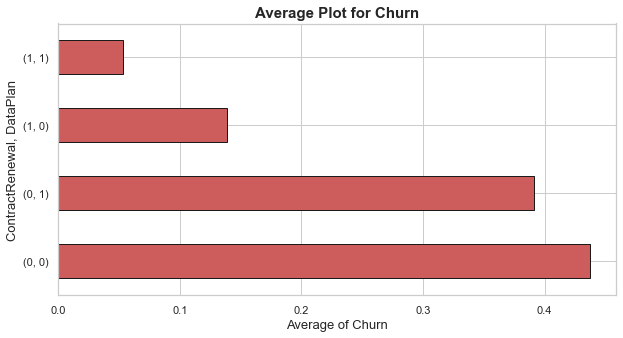

In [101]:
# Contract Renewal and Data Plan impact on Churning Probability
ax = plt.figure(figsize=(10,5))
data.groupby(['ContractRenewal',"DataPlan"])['Churn'].mean().plot(figsize=(10,5),kind="barh",color="indianred",
                                                               edgecolor='k')
plt.title("Average Plot for Churn" , size=15, fontweight='bold', fontfamily='sans')
plt.ylabel("ContractRenewal, DataPlan",size=13, fontweight='light', fontfamily='sans')
plt.xlabel("Average of Churn",size=13, fontweight='light', fontfamily='sans')
plt.grid(True)
plt.show()

Contract Renewal and Data Plan are two important attributes when trying to predict customer churn. If a customer has recently renewed a contract and has a data plan, the probability of churning is much more lower than if he/she has not. Moreover, we can also see that having renewed a contract recently has a higher impact on the churning rate than having a data plan.

**2. Build the model and test in the same input data**

First of all, we are going to prepare the data (split the data for train and test)

In [104]:
# Split data for train and test
X = data.drop('Churn', axis = 1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

**CLASSIFICATION TREE**

In [153]:
#Identifying optimal tree depth (the one which reduces over-fitting while still maintaining good performance of metrics)
L = []
for i in range(1,15):
    clf_tree = DecisionTreeClassifier(max_depth=i)
    clf_tree.fit(X_train,y_train)
    y_pred = clf_tree.predict(X_test)
    L.append(round(accuracy_score(y_test,y_pred),4))
print(L.index(max(L)))
print(max(L))

3
0.91


The optimal tree depth is 3

In [157]:
# Train the model using DecisionTree classifier
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

# Predict test set labels
y_pred = clf_tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

Now we are going to evaluate the classification tree

In [158]:
# Predict test set labels
y_pred = clf_tree.predict(X_test)
 
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.91


Finally, we are going to plot the tree

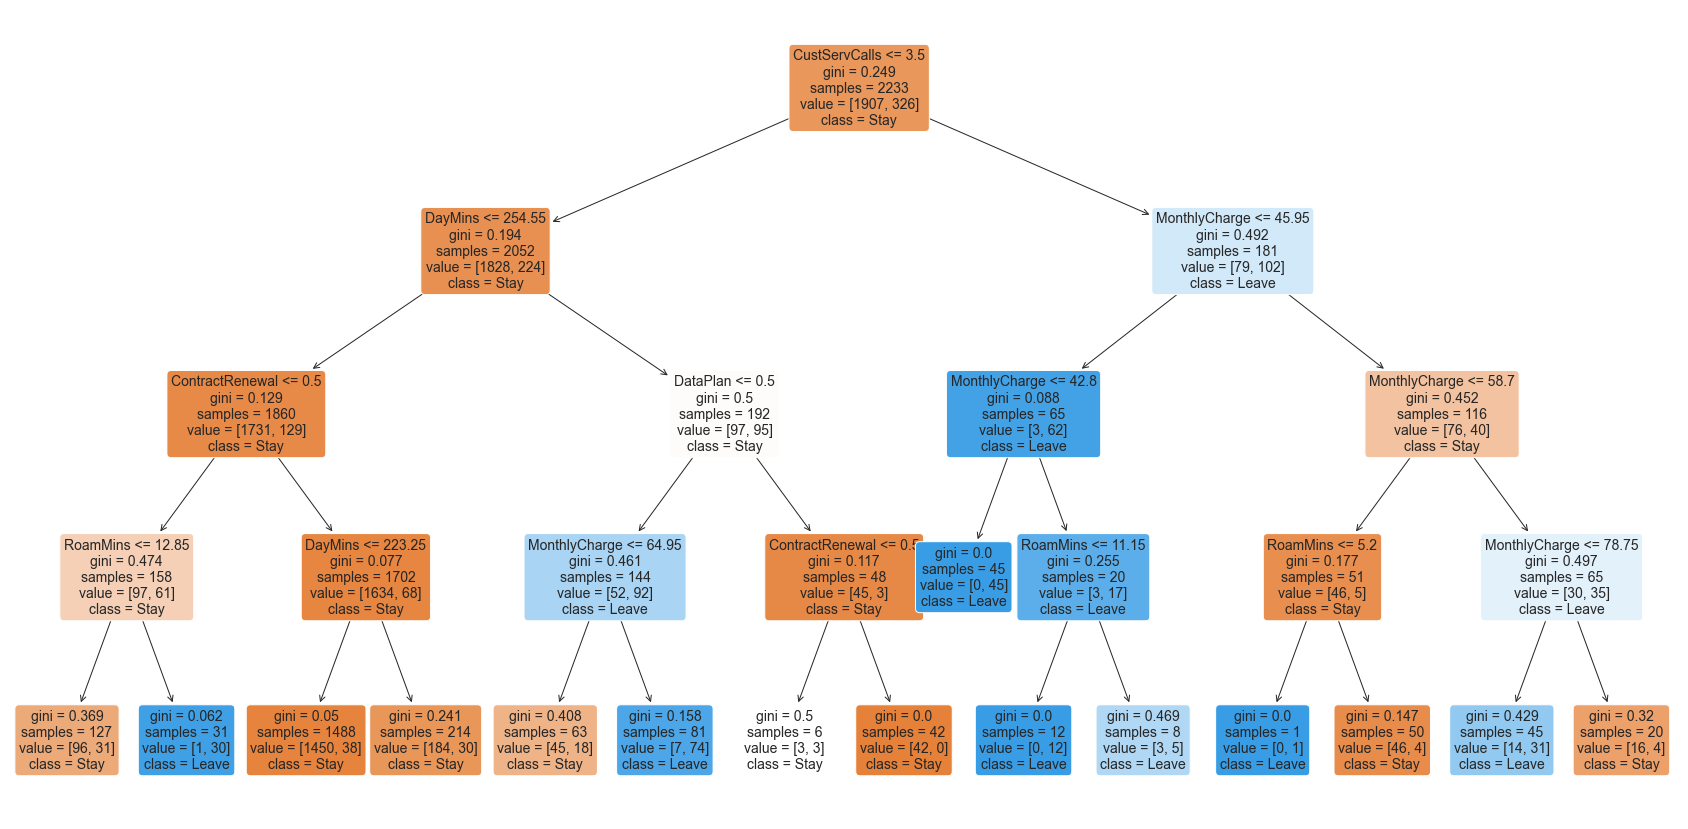

In [159]:
from sklearn.tree import plot_tree
#Ploting the tree
plt.figure(figsize=(30,15))
plot_data = plot_tree(clf_tree,
                      feature_names=X.columns, 
                      class_names={0: 'Stay', 1: 'Leave'}, 
                      filled=True, 
                      rounded=True, 
                      fontsize=14)

Text(39.5, 0.5, 'True')

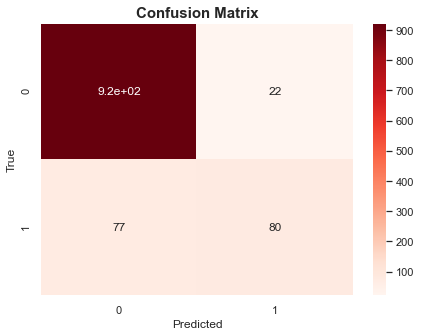

In [160]:
# get an ounderstanding of the wrong predictions
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot = True, cmap="Reds")
plt.title('Confusion Matrix',size=15, fontweight='bold', fontfamily='sans')
plt.xlabel('Predicted')
plt.ylabel('True')

**RANDOM FOREST CLASSIFIER**

In [192]:
# Instantiate rf
rf = RandomForestClassifier(max_depth= None, random_state=1)
             
# Train Random Forest Classifier   
model_rf=rf.fit(X_train, y_train) 
 
# Predict the response for test dataset
y_pred_RF = rf.predict(X_test)
 
# Evaluate acc_test
acc_test_rf = accuracy_score(y_test, y_pred_RF)
print('Test set accuracy of rf: {:.2f}'.format(acc_test_rf)) 

Test set accuracy of rf: 0.94


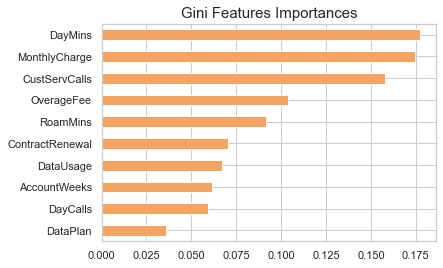

In [194]:
# IMPURITY-BASED FEATURES IMPORTANCE
# Create a pd.Series of features importances
features=['AccountWeeks','ContractRenewal','DataPlan', 'DataUsage',	'CustServCalls', 'DayMins',	'DayCalls',	'MonthlyCharge', 'OverageFee', 'RoamMins']
importances = pd.Series(data=rf.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted = importances.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

Using Random forest algorithm, the feature importance can be measured as the average impurity decrease computed from all decision trees in the forest.
As we can see, DayMins and CustServCalls are the two most important features in the tranining data, so they are the ones with more predictive power of the target variable (whether or not a customer will churn). DayCalls and DataPlan, on the other hand, are consistently ranked as unimportant, meaning that they don't seem to be that relevant in predicting the target variable. 
 

In [210]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance


curr_feat_1 = 'DataPlan'
curr_feat_2 = 'DayCalls'

feature_importance = get_feature_importance(model, X_train, y_train, curr_feat_1)
print(f'feature importance of "{curr_feat_1}" on train set is '
      f'{feature_importance:.3}')

feature_importance_2 = get_feature_importance(model, X_train, y_train, curr_feat_2)
print(f'feature importance of "{curr_feat_2}" on train set is '
      f'{feature_importance_2:.3}')

feature importance of "DataPlan" on train set is 0.0
feature importance of "DayCalls" on train set is 0.0


In [212]:
n_repeats = 10

list_feature_importance = []
for n_round in range(n_repeats):
    list_feature_importance.append(
        get_feature_importance(model, X_train, y_train, curr_feat_1))

print(
    f'feature importance of "{curr_feat_1}" on train set is '
    f'{np.mean(list_feature_importance):.3} '
    f'± {np.std(list_feature_importance):.3}')


list_feature_importance_2 = []
for n_round in range(n_repeats):
    list_feature_importance_2.append(
        get_feature_importance(model, X_train, y_train, curr_feat_2))
print(
    f'feature importance of "{curr_feat_2}" on train set is '
    f'{np.mean(list_feature_importance):.3} '
    f'± {np.std(list_feature_importance):.3}')

feature importance of "DataPlan" on train set is 0.0 ± 0.0
feature importance of "DayCalls" on train set is 0.0 ± 0.0


**ADABOOST**

In [180]:
# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model_adaboost = ada.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_ADA = model.predict(X_test)
 
# Evaluate acc_test
acc_ada = accuracy_score(y_test, y_pred_ADA)
print('Test set accuracy of ada: {:.2f}'.format(acc_ada)) 

Test set accuracy of ada: 0.89


**XGBOOST**

In [179]:
# Create xgboost classifer object
xgboost = XGBClassifier()

# Train XGboost Classifer
model_xgboost = xgboost.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_xgboost = model_xgboost.predict(X_test)
 
# Evaluate acc_test
acc_xg = accuracy_score(y_test, y_pred_xgboost)
print('Test set accuracy of xgboost: {:.2f}'.format(acc_xg)) 

Test set accuracy of xgboost: 0.93


**3. Assessing accuracy using CROSS-VALIDATION**

**4. Hyperparameter Tunning**

In [221]:
# RANDOM FOREST

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [222]:
# Define the dictionary 'params_rf'
param_grid = {
    'n_estimators':[100, 350],
    'max_features':['log2', 'auto', 'sqrt'],
    'min_samples_leaf':[2, 10]}

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
 
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train) 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10],
                         'n_estimators': [100, 350]},
             verbose=2)

In [223]:
# Predict test set labels
y_pred_opt = grid_search.predict(X_test)
 
# Evaluate acc_test
acc_opt = accuracy_score(y_test, y_pred_opt)
print('Test set accuracy of rf optimized: {:.2f}'.format(acc_opt)) 

Test set accuracy of rf optimized: 0.93
